# Importing all the required libraries.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                       
import matplotlib.pyplot as plt             
%matplotlib inline     
sns.set(color_codes=True)
import warnings
warnings.filterwarnings("ignore")

# Importing the dataset

In [2]:
df=pd.read_csv("Data//matches.csv")

# Performing EDA

In [3]:
df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
df.tail()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
755,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


In [5]:
df.dtypes

id                  int64
Season             object
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
umpire1            object
umpire2            object
umpire3            object
dtype: object

In [6]:
df.shape

(756, 18)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [8]:
df.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000


# Looking for duplicate rows

In [9]:
duplicate_rows=df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows.shape)

number of duplicate rows:  (0, 18)


# Finding outliers

In [10]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

id                377.5
dl_applied          0.0
win_by_runs        19.0
win_by_wickets      6.0
dtype: float64


In [11]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(569, 18)

In [12]:
corr = df.corr()
corr

,id,dl_applied,win_by_runs,win_by_wickets
id,1.000000,NaN,0.016424,-0.030280
dl_applied,NaN,NaN,NaN,NaN
win_by_runs,0.016424,NaN,1.000000,-0.688346
win_by_wickets,-0.030280,NaN,-0.688346,1.000000


# Finding null values

In [13]:
df.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            569
dtype: int64

# dropping the column umpire3 and also dropped some rows containing the null values after removing the umpire3 column.

In [14]:
df = df.iloc[:,:-1]
df.dropna(inplace=True)

In [15]:
df.isnull().sum()

id                 0
Season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

<AxesSubplot:>

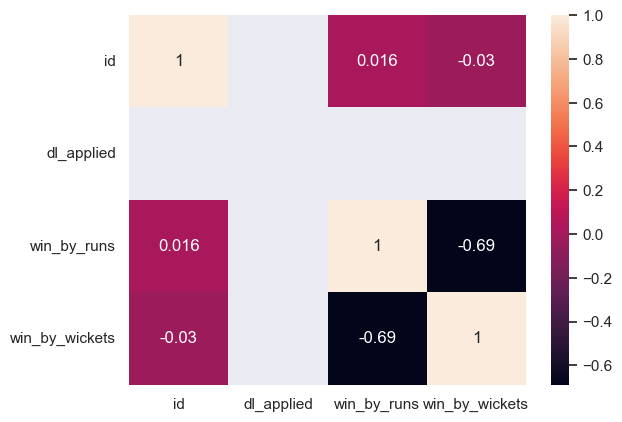

In [16]:
sns.heatmap(corr,annot=True)

In [17]:
df["team1"].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Kolkata Knight Riders',
       'Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Rising Pune Supergiants'], dtype=object)

# Delhi Daredevils is the old name of the Delhi Capitals. Similarly, Decan Chargers is the old name of Sunrisers Hyderabad. So we are changing the old name to the newer one. 

In [18]:
#for Delhi Capitals
df['team1']=df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
df['team2']=df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')
df['winner']=df['winner'].str.replace('Delhi Daredevils','Delhi Capitals')
#for sunrisers Hyderabad
df['team1']=df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
df['team2']=df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
df['winner']=df['winner'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

# DATA VISUALIZATION

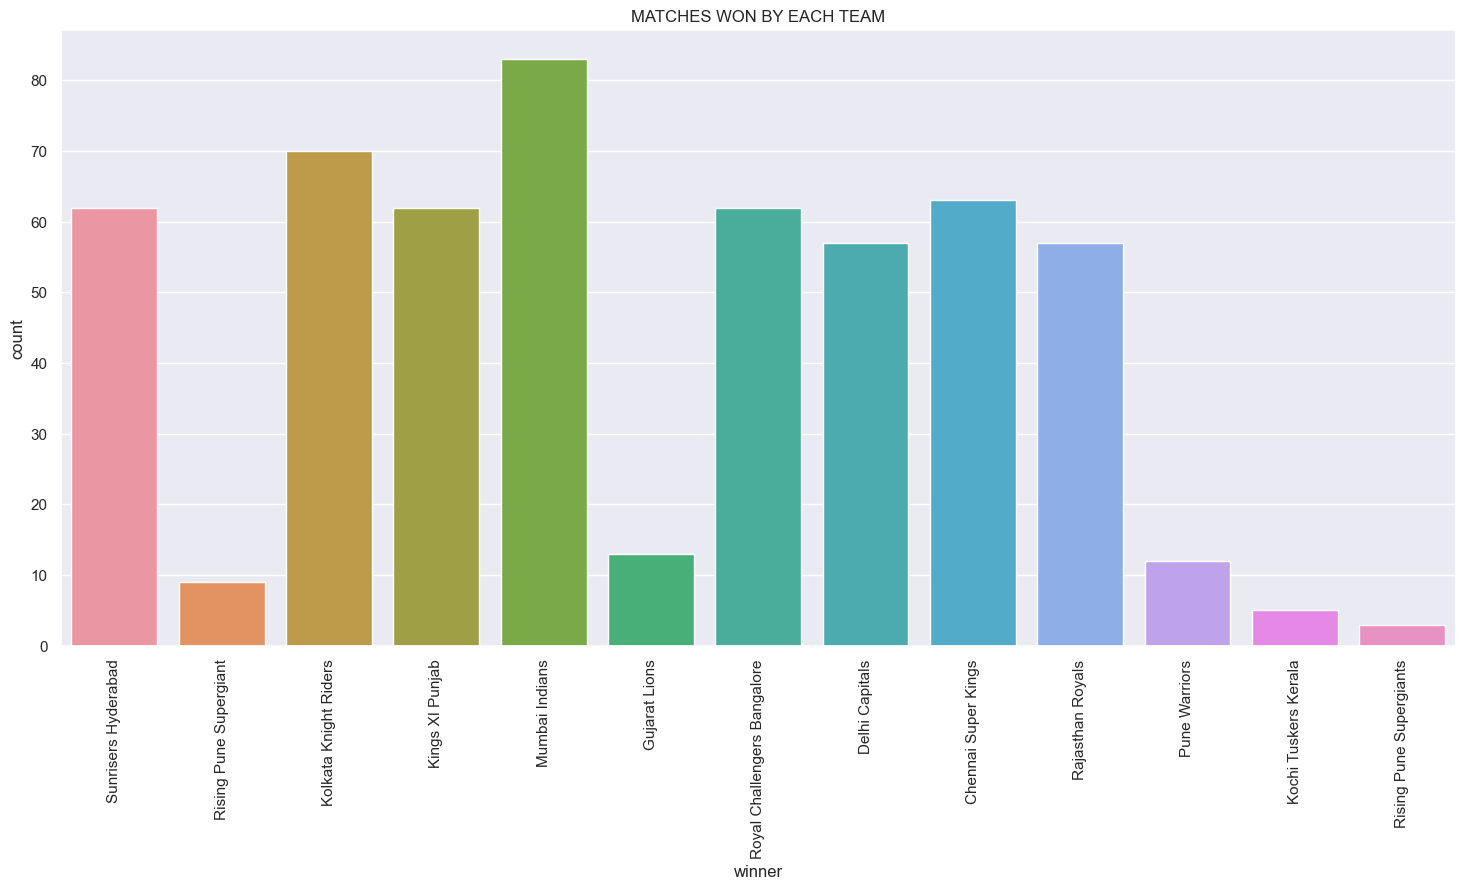

In [19]:
plt.figure(figsize=(18,8))
sns.countplot(x='winner',data=df) 
plt.xticks(rotation=90)
plt.title("MATCHES WON BY EACH TEAM")
plt.show()

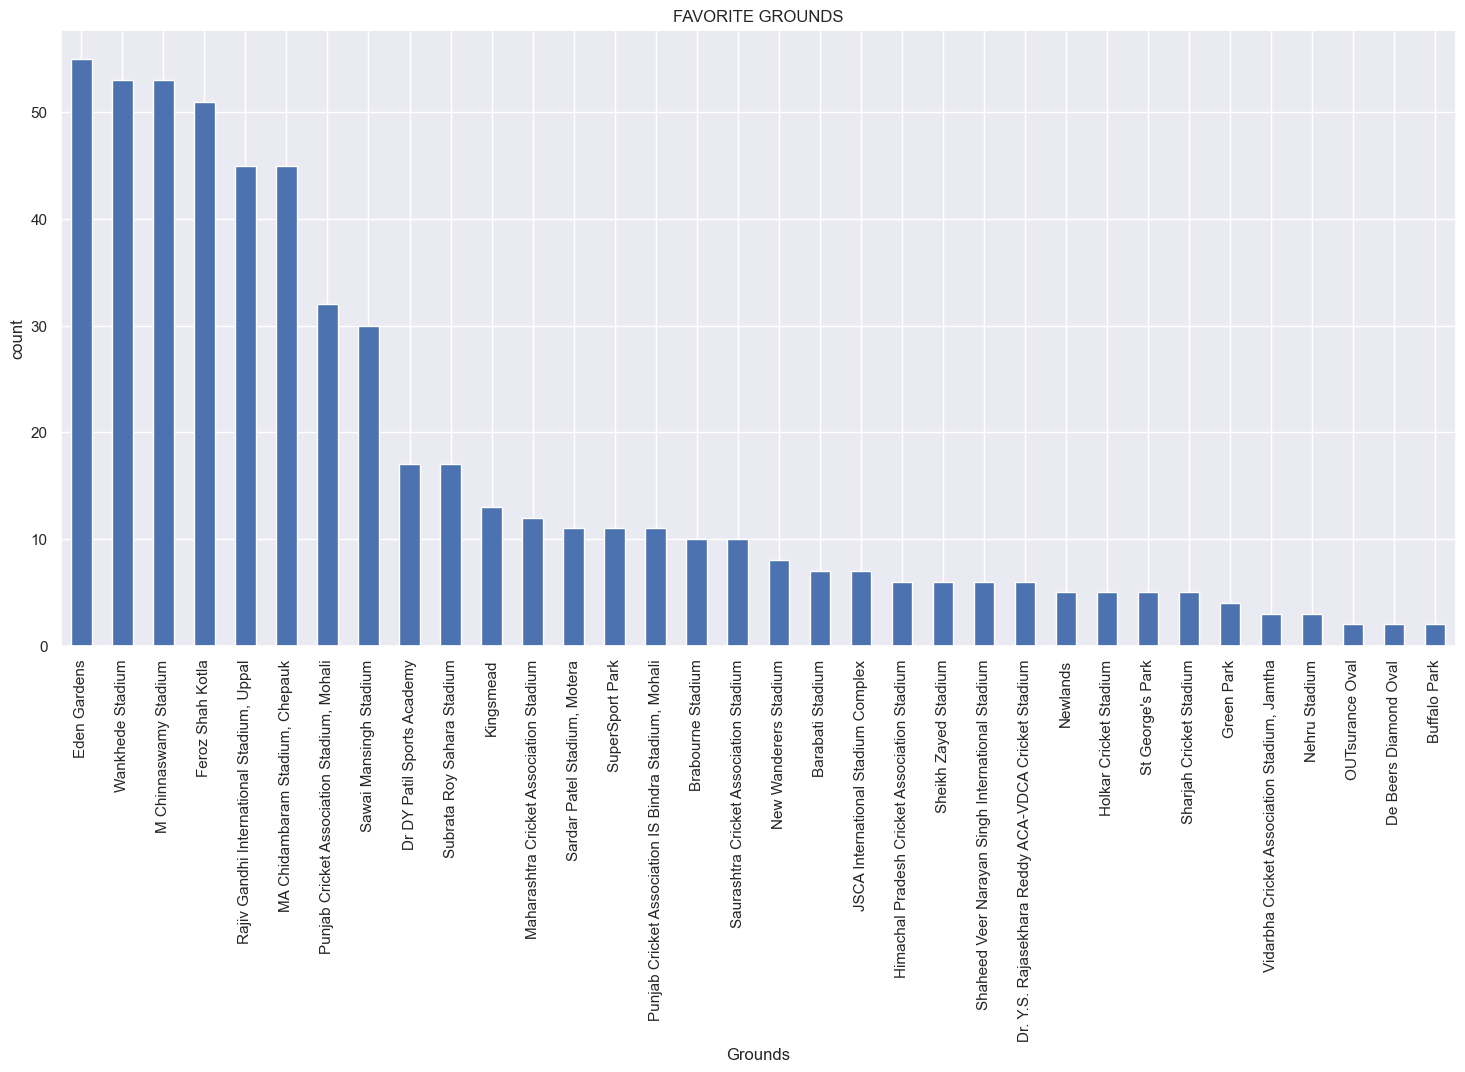

In [20]:
plt.figure(figsize=(18,8))
ax = df['venue'].value_counts().plot.bar()
ax.set_xlabel('Grounds')
ax.set_ylabel('count')
plt.title("FAVORITE GROUNDS")
plt.show()

Text(0.5, 1.0, 'Total Number of matches played in different stadium')

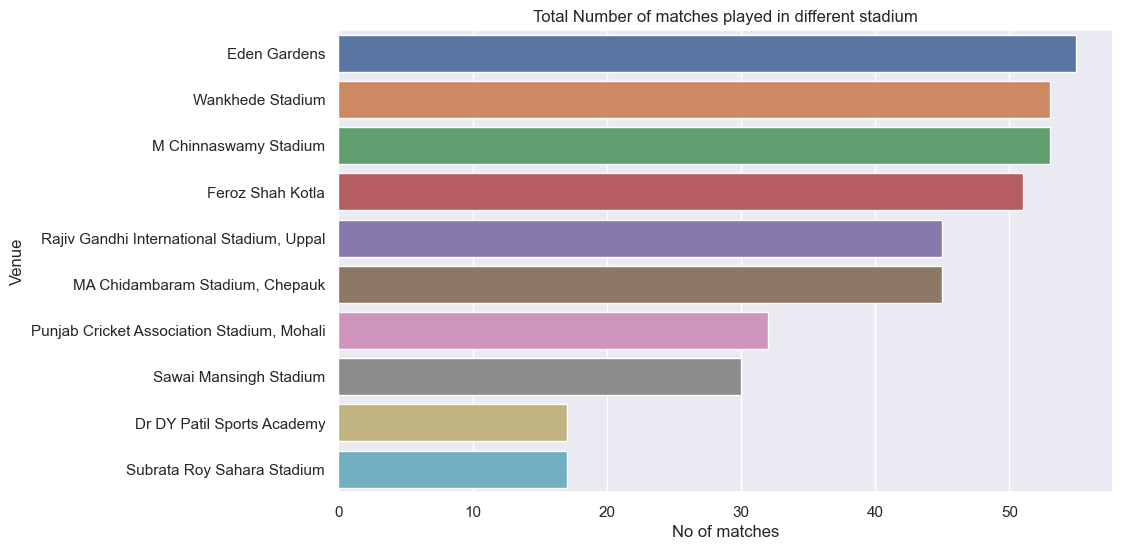

In [21]:
plt.figure(figsize = (10,6))
sns.countplot(y = 'venue',data = df,order = df['venue'].value_counts().iloc[:10].index)
plt.xlabel('No of matches',fontsize=12)
plt.ylabel('Venue',fontsize=12)
plt.title('Total Number of matches played in different stadium')

Text(0.5, 1.0, 'Toss Decision')

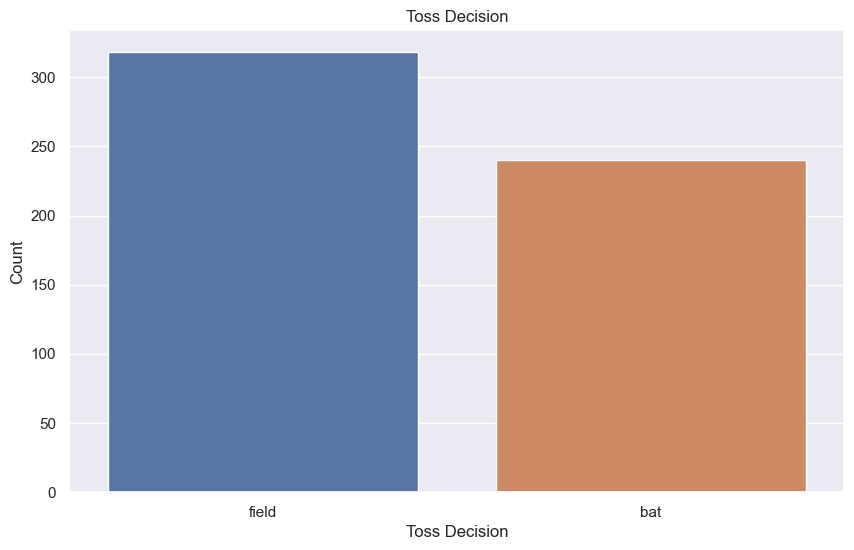

In [22]:
plt.figure(figsize = (10,6))
sns.countplot(x = "toss_decision", data=df)
plt.xlabel('Toss Decision',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Toss Decision')

# Dropping unnecessary columns

In [23]:
df.drop(["id", "Season","city","date", "player_of_match", 'umpire1', "venue", "umpire2"], axis=1, inplace=True)

In [24]:
df.head()

,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0
1,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7
2,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10
3,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6
5,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9


# Splitting data in x and y 

In [25]:
x = df.drop(["winner"], axis=1)
y = df["winner"]

In [26]:
x

,team1,team2,toss_winner,toss_decision,result,dl_applied,win_by_runs,win_by_wickets
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,35,0
1,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,0,7
2,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,0,10
3,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,0,6
5,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,0,9
...,...,...,...,...,...,...,...,...
631,Delhi Capitals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,0,6
632,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,0,4
633,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,22,0
634,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,0,4


In [27]:
y

0              Sunrisers Hyderabad
1           Rising Pune Supergiant
2            Kolkata Knight Riders
3                  Kings XI Punjab
5              Sunrisers Hyderabad
                  ...             
631    Royal Challengers Bangalore
632    Royal Challengers Bangalore
633            Sunrisers Hyderabad
634            Sunrisers Hyderabad
635            Sunrisers Hyderabad
Name: winner, Length: 558, dtype: object

# Categorical values are present in the input data, so we are converting them into numerical values using the pandas, get_dummies method.

In [28]:
x= pd.get_dummies(x, ["team1","team2", "toss_winner", "toss_decision", "result"], drop_first = True)

# Output data is also a categorical value, so we are converting it into numerical using LabelEncoder of sklearn.

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Training and testing data 

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8)

# Model Creation and Evaluation

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
model = RandomForestClassifier(n_estimators=200,min_samples_split=3,
                               max_features = "auto")

In [33]:
model.fit(x_train, y_train)

RandomForestClassifier(min_samples_split=3, n_estimators=200)

In [34]:
y_pred = model.predict(x_test)

# Calculating accuracy for testing and trainning

In [46]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred, y_test)

In [48]:
accuracy

0.9017857142857143